Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [73]:
import pandas as pd
import numpy as np

Read files

In [74]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,ZWE,Africa,Zimbabwe,2020-12-21,12422.0,97.0,152.000,322.0,2.0,1.857,835.771,6.526,10.227,21.665,0.135,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205.0,200096.0,13.463,0.081,1565.0,0.105,0.097,10.3,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56269,ZWE,Africa,Zimbabwe,2020-12-22,12544.0,122.0,146.000,326.0,4.0,2.286,843.979,8.208,9.823,21.934,0.269,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1425.0,201521.0,13.559,0.096,1689.0,0.114,0.086,11.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56270,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,851.515,7.536,8.718,22.203,0.269,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0,203022.0,13.660,0.101,1710.0,0.115,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56271,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56273 entries, 0 to 56272
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            55950 non-null  object 
 1   continent                           55611 non-null  object 
 2   location                            56273 non-null  object 
 3   date                                56273 non-null  object 
 4   total_cases                         55716 non-null  float64
 5   new_cases                           55710 non-null  float64
 6   new_cases_smoothed                  54754 non-null  float64
 7   total_deaths                        47536 non-null  float64
 8   new_deaths                          47535 non-null  float64
 9   new_deaths_smoothed                 54754 non-null  float64
 10  total_cases_per_million             55393 non-null  float64
 11  new_cases_per_million               55387

Graphical representation

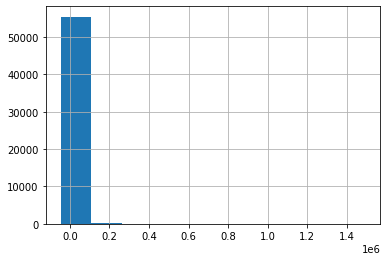

In [76]:
from matplotlib import pyplot as plt

train.new_cases.hist()

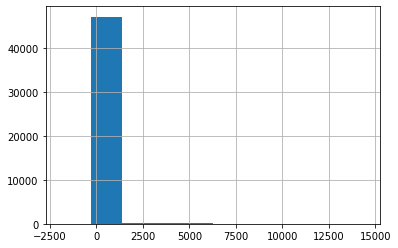

In [77]:
train.new_deaths.hist()

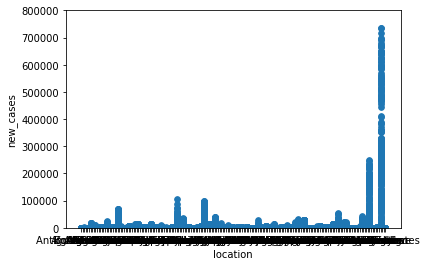

In [78]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,800000), s=32);

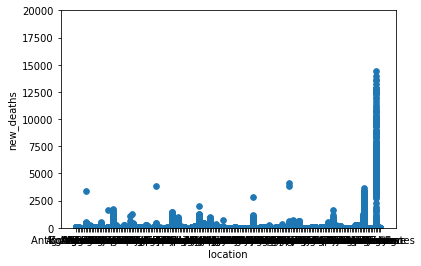

In [79]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,20000), s=32);

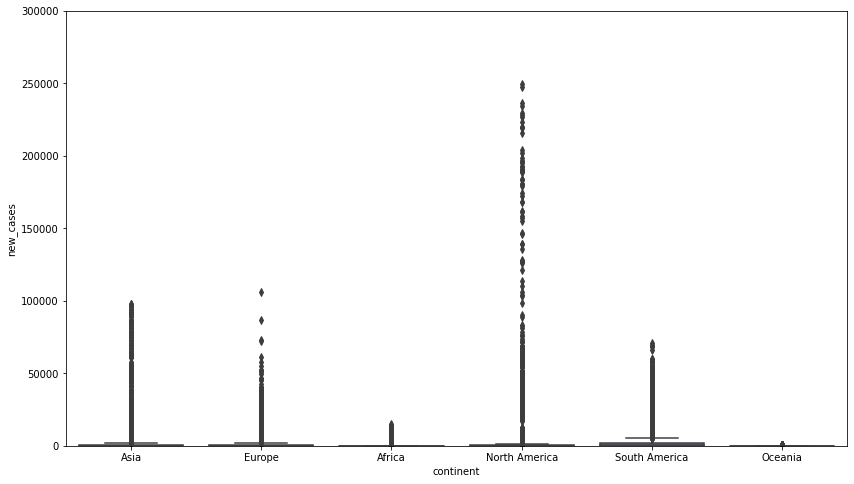

In [80]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=300000);

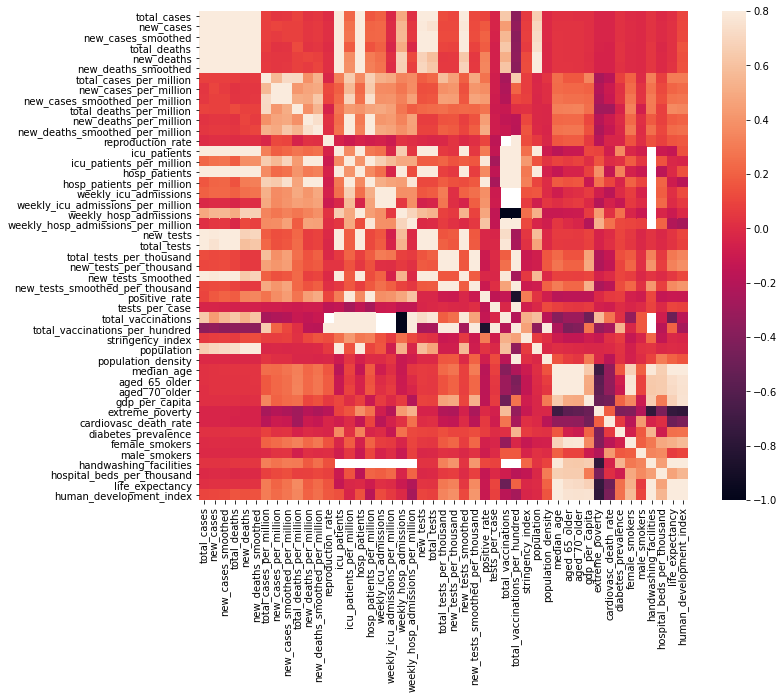

In [81]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [82]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52901,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52902,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52903,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52904,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
52905,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,GBR,Europe,United Kingdom,2020-12-21,2079678.0,33517.0,29258.714,67718.0,215.0,459.714,30634.857,493.725,430.998,997.525,3.167,6.772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423675.0,48469931.0,713.990,6.241,396256.0,5.837,0.074,13.5,tests performed,NaN,NaN,78.70,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53227,GBR,Europe,United Kingdom,2020-12-22,2116609.0,36931.0,31881.857,68409.0,691.0,486.143,31178.872,544.015,469.638,1007.704,10.179,7.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453903.0,48926548.0,720.716,6.686,416747.0,6.139,0.077,13.1,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53228,GBR,Europe,United Kingdom,2020-12-23,2155996.0,39387.0,33894.286,69157.0,748.0,505.571,31759.065,580.193,499.282,1018.723,11.018,7.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507384.0,49434314.0,728.196,7.474,437220.0,6.441,0.078,12.9,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53229,GBR,Europe,United Kingdom,2020-12-24,2195144.0,39148.0,34410.857,69732.0,575.0,511.714,32335.737,576.673,506.892,1027.193,8.470,7.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,1.18,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


Graph of new cases

Text(0, 0.5, 'new_cases')

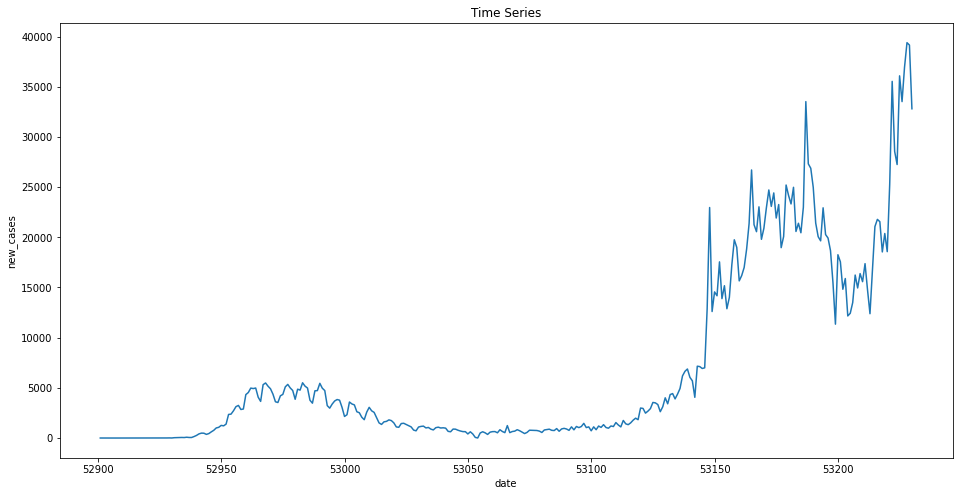

In [83]:
import matplotlib.pyplot as plt

uk_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_cases")

Graph of new deaths

Text(0, 0.5, 'new_deaths')

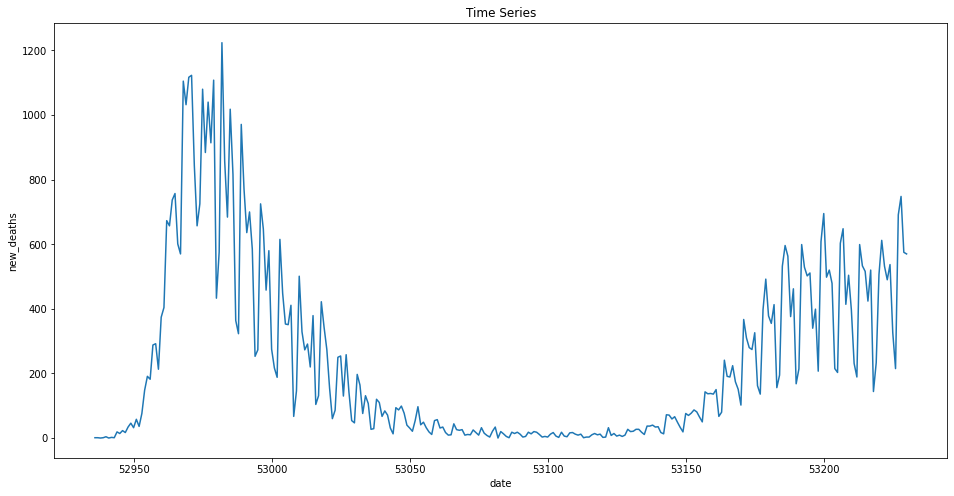

In [84]:
uk_cov19['new_deaths'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_deaths")

US

In [85]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_uk=s = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53231,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
53232,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
53233,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
53234,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
53235,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53565,USA,North America,United States,2020-12-21,18035209.0,190519.0,215428.857,319364.0,1696.0,2655.286,54486.601,575.581,650.837,964.838,5.124,8.022,NaN,21899.0,66.160,115351.0,348.490,NaN,NaN,NaN,NaN,655126.0,230888003.0,697.541,1.979,1256992.0,3.798,NaN,NaN,tests performed,614117.0,0.19,71.76,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
53566,USA,North America,United States,2020-12-22,18230242.0,195033.0,214895.571,322765.0,3401.0,2714.857,55075.819,589.219,649.226,975.113,10.275,8.202,NaN,22207.0,67.090,117761.0,355.771,NaN,NaN,NaN,NaN,364995.0,231252998.0,698.644,1.103,1086847.0,3.283,NaN,NaN,tests performed,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
53567,USA,North America,United States,2020-12-23,18458373.0,228131.0,212142.429,326124.0,3359.0,2668.714,55765.031,689.212,640.909,985.261,10.148,8.063,NaN,22489.0,67.942,119463.0,360.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1008025.0,0.30,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
53568,USA,North America,United States,2020-12-24,18650454.0,192081.0,205838.143,329023.0,2899.0,2604.857,56345.332,580.300,621.863,994.019,8.758,7.870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.7

Text(0, 0.5, 'new_cases')

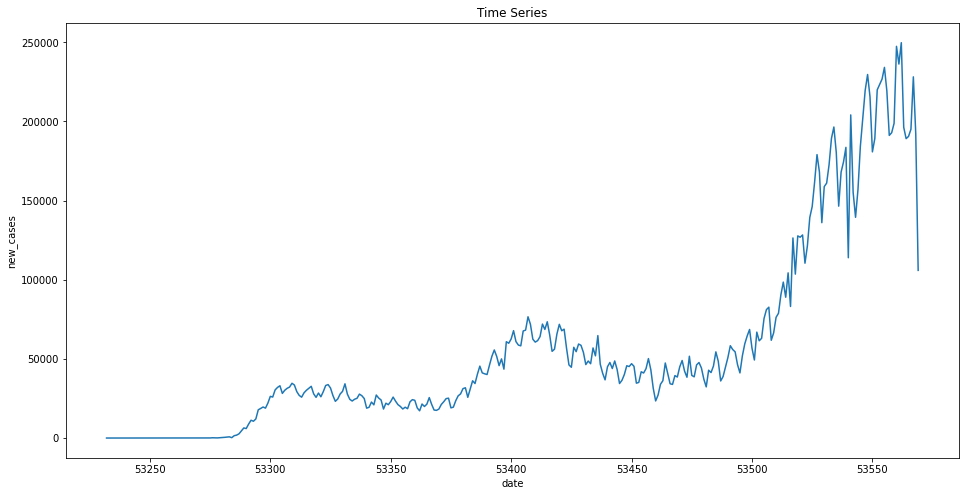

In [104]:
us_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_cases")

Text(0, 0.5, 'new_deaths')

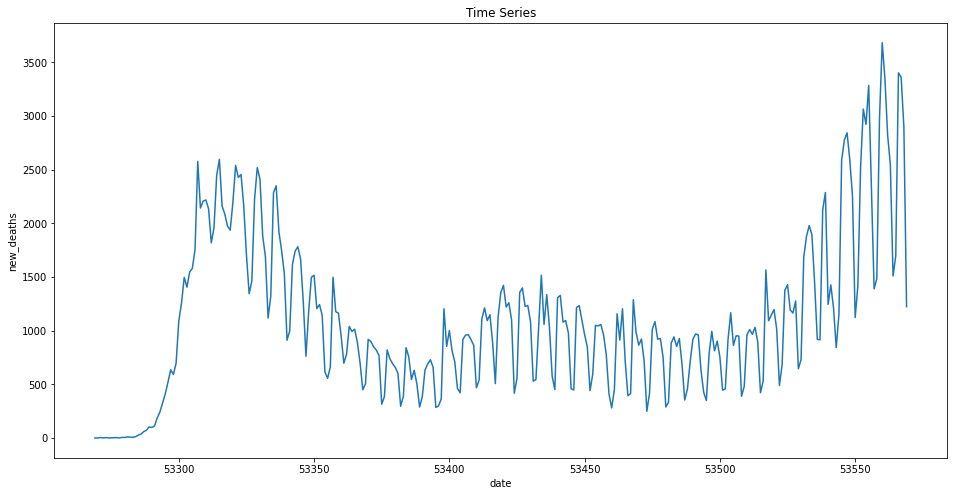

In [105]:
us_cov19['new_deaths'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new_deaths")

Check for null values

In [86]:
train.isnull().sum()

iso_code                                323
continent                               662
location                                  0
date                                      0
total_cases                             557
new_cases                               563
new_cases_smoothed                     1519
total_deaths                           8737
new_deaths                             8738
new_deaths_smoothed                    1519
total_cases_per_million                 880
new_cases_per_million                   886
new_cases_smoothed_per_million         1837
total_deaths_per_million               9047
new_deaths_per_million                 9048
new_deaths_smoothed_per_million        1837
reproduction_rate                     13770
icu_patients                          50078
icu_patients_per_million              50078
hosp_patients                         49346
hosp_patients_per_million             49346
weekly_icu_admissions                 55745
weekly_icu_admissions_per_millio

Impute missing values

In [87]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
date           object
tests_units    object
dtype: object

Impute null values in categorical columns

In [88]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['date'] = train['date'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [89]:
train.fillna(0,inplace=True)

Ordinal encoder

In [90]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.date = enc.fit_transform(train.date.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [91]:
iso_code = train.iso_code
date = train.date

y = train[['new_cases', 'new_deaths']]
X = train.drop(['iso_code', 'date', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

In [92]:
y

,new_cases,new_deaths
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
56268,97.0,2.0
56269,122.0,4.0
56270,112.0,4.0
56271,130.0,9.0


In [93]:
X

,continent,location,new_cases,new_deaths,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,0.0,191.0,97.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1205.0,200096.0,13.463,0.081,1565.0,0.105,0.097,10.3,3.0,0.0,0.0,0.00,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56269,0.0,191.0,122.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1425.0,201521.0,13.559,0.096,1689.0,0.114,0.086,11.6,3.0,0.0,0.0,0.00,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56270,0.0,191.0,112.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1501.0,203022.0,13.660,0.101,1710.0,0.115,0.076,13.2,3.0,0.0,0.0,0.00,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56271,0.0,191.0,130.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


Split training file up for training and validation

In [94]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50645, 40), (5628, 40), (50645, 2), (5628, 2))

Select model

In [95]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(Ridge()).fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31108e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.31108e-21): result may not be accurate.
  overwrite_a=True).T


Predict on validation set

In [96]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

1.0
0.9999995692587688


(None, None)

In [97]:
y_val

,new_cases,new_deaths
46025,0.0,0.0
19628,144.0,0.0
600,0.0,0.0
35562,1016.0,7.0
52937,55.0,1.0
...,...,...
7625,99.0,2.0
2862,68.0,0.0
24807,1900.0,16.0
13869,207.0,1.0


In [98]:
y_pred

array([[   0,    0],
       [ 143,    0],
       [   0,    0],
       ...,
       [1899,   15],
       [ 207,    0],
       [  35,    0]])

In [99]:
y_val.iloc[:,0]

46025       0.0
19628     144.0
600         0.0
35562    1016.0
52937      55.0
          ...  
7625       99.0
2862       68.0
24807    1900.0
13869     207.0
10572      36.0
Name: new_cases, Length: 5628, dtype: float64

In [100]:
y_val.iloc[:,1]

46025     0.0
19628     0.0
600       0.0
35562     7.0
52937     1.0
         ... 
7625      2.0
2862      0.0
24807    16.0
13869     1.0
10572     0.0
Name: new_deaths, Length: 5628, dtype: float64

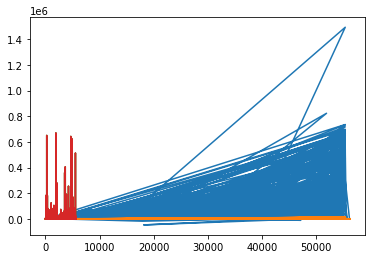

In [101]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val.new_cases])
pyplot.plot([None for i in y_train] + [x for x in y_pred[:,0]])
pyplot.show()

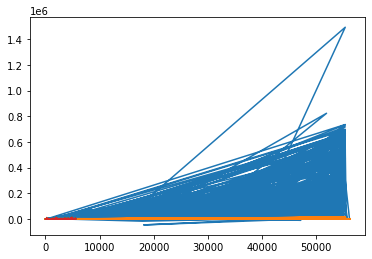

In [102]:
pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val.new_deaths])
pyplot.plot([None for i in y_train] + [x for x in y_pred[:,1]])
pyplot.show()

Put predictions in dataframe

In [103]:
df_val=pd.DataFrame({'actual_cases': y_val.new_cases, 'predicted_cases': y_pred[:,0], 'actual_deaths': y_val.new_deaths, 'predicted_deaths':y_pred[:,1]})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_cases,predicted_cases,actual_deaths,predicted_deaths
0,0.0,0,0.0,0
1,144.0,143,0.0,0
2,0.0,0,0.0,0
3,1016.0,1015,7.0,7
4,55.0,54,1.0,1
...,...,...,...,...
5623,99.0,98,2.0,2
5624,68.0,67,0.0,0
5625,1900.0,1899,16.0,15
5626,207.0,207,1.0,0
